In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split  
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df_sub = pd.read_csv("input_data/Products_ThoiTrangNam_comments_20K_pre.csv")

In [3]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11915 entries, 0 to 11914
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   11915 non-null  int64 
 1   comment      11915 non-null  object
 2   rating       11915 non-null  int64 
 3   label        11915 non-null  int64 
 4   comment_new  11863 non-null  object
dtypes: int64(3), object(2)
memory usage: 465.6+ KB


In [4]:
df_sub.head()

,Unnamed: 0,comment,rating,label,comment_new
0,1,", Chất lượng sản phẩm tuyệt vời, Đóng gói sản ...",5,1,chất_lượng sản_phẩm tuyệt_vời đóng_gói sản_phẩ...
1,2,", Chất lượng sản phẩm tuyệt vời",5,1,chất_lượng sản_phẩm
2,3,Đóng gói giao hàng nhanh. Chất lượng tốt trong...,5,1,đóng gói hàng chất_lượng tốt tầm giá
3,4,", Đóng gói sản phẩm rất đẹp và chắc chắn",5,1,đóng gói sản_phẩm đẹp
4,5,Mình mua bị chật nhưng shop nhiệt tình đồng ý ...,5,1,chật cửa tiệm nhiệt_tình đồng_ý đổi kích_thước...


### Visualization Like & Not Like

In [5]:
from wordcloud import WordCloud

In [6]:
df_sub_like = df_sub[df_sub.label ==1]
df_sub_notlike = df_sub[df_sub.label ==0]

In [7]:
# Like
wc_like = WordCloud(
    background_color='black',
    max_words=500
)
# generate the word cloud
wc_like.generate(str(df_sub_like['comment_new'].values))

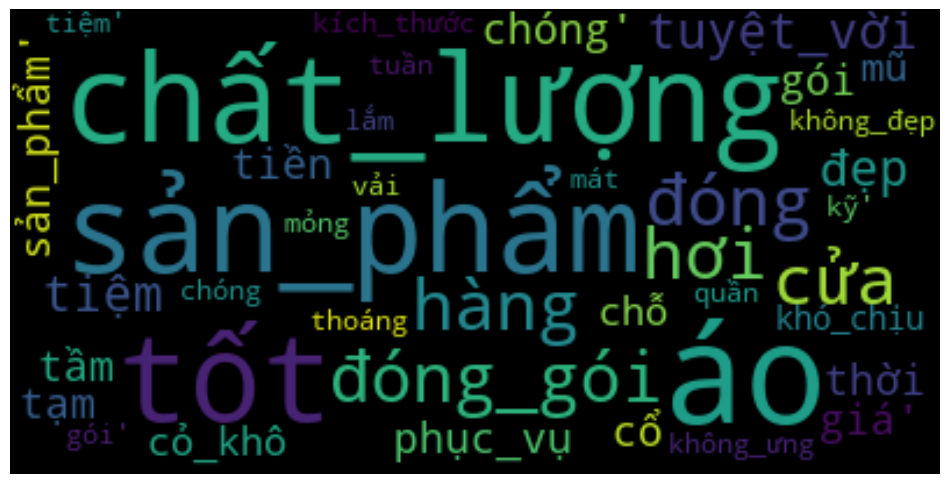

In [8]:
# display the word clouds
plt.figure(figsize=(12, 12))
plt.imshow(wc_like, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
# Not Like
wc_notlike = WordCloud(
    background_color='black',
    max_words=500    
)
# generate the word cloud
wc_notlike.generate(str(df_sub_notlike['comment_new'].values))

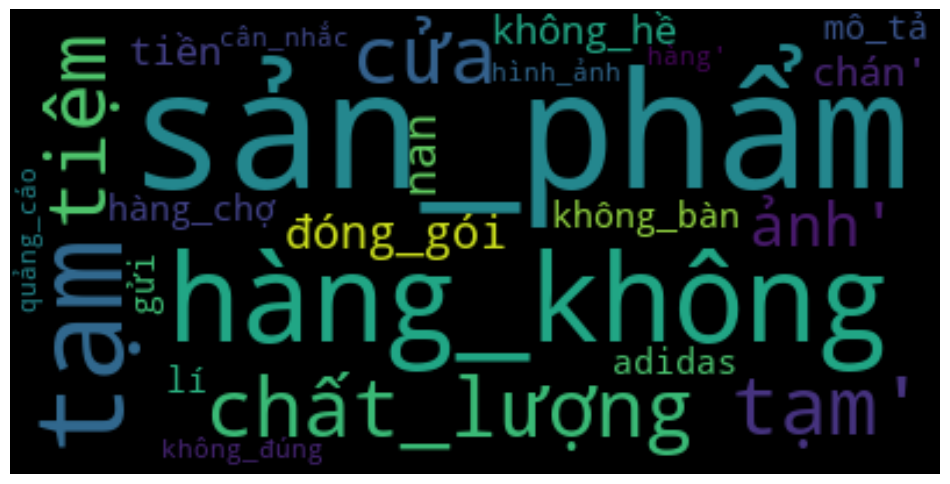

In [10]:
# display the word clouds
plt.figure(figsize=(12, 12))
plt.imshow(wc_notlike, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Build Model

In [11]:
# x, y
X = df_sub['comment_new'].apply(lambda x: np.str_(x))
y = df_sub['label']

In [12]:
X.head()

0    chất_lượng sản_phẩm tuyệt_vời đóng_gói sản_phẩ...
1                                  chất_lượng sản_phẩm
2                 đóng gói hàng chất_lượng tốt tầm giá
3                                đóng gói sản_phẩm đẹp
4    chật cửa tiệm nhiệt_tình đồng_ý đổi kích_thước...
Name: comment_new, dtype: object

In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=0.3,
                                                            random_state = 42)

In [15]:
X_train.head()

8387                                          mặc lủng túi
3997     hải mặc bố_mẹ đẹp giành mặc áo cười_cười_cười_...
11313    áo rách ngực không_để_ý đem nhúng cửa tiệm khô...
10138    màu đen màu bảng kích_thước buồn cửa tiệm né c...
5045                                   đẹp thích giấy thơm
Name: comment_new, dtype: object

In [16]:
pipe_line = Pipeline([          
            ("vect", CountVectorizer()),#bag-of-words
            ("tfidf", TfidfTransformer()),#tf-idf
            ("clf", LogisticRegression()) #model logistic regression
        ])

In [17]:
pipe_line.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

In [18]:
pipe_line.score(X_train, y_train)

0.8721822541966426

In [19]:
pipe_line.score(X_test, y_test)

0.8335664335664336

In [20]:
y_testhat = pipe_line.predict(X_test)

In [21]:
# Xem kết quả thống kê
print(confusion_matrix(y_test, y_testhat))  
print(classification_report(y_test, y_testhat))

[[ 743  367]
 [ 228 2237]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.71      1110
           1       0.86      0.91      0.88      2465

    accuracy                           0.83      3575
   macro avg       0.81      0.79      0.80      3575
weighted avg       0.83      0.83      0.83      3575



In [31]:
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_testhat) 

In [32]:
fpr

array([0.        , 0.33063063, 1.        ])

In [33]:
tpr

array([0.        , 0.90750507, 1.        ])

In [34]:
# calculate AUC
auc = metrics.roc_auc_score(y_test, y_testhat)
print('AUC: %.3f' % auc)

AUC: 0.788


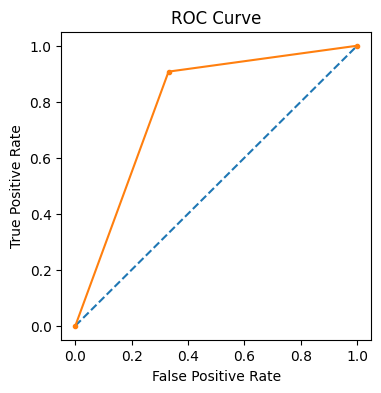

In [35]:
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [36]:
# recall của not_like chưa cao
# có giải pháp nào khác để tốt hơn không???

### Under sampling

In [37]:
def transform_text_data(X_train, X_test):
    cv = CountVectorizer(max_features=1000)
    cv_model = cv.fit(X_train)
    X_train_cv = cv_model.transform(X_train)
    X_test_cv = cv_model.transform(X_test)
    display(X_train_cv.shape, X_test_cv.shape)
    tf = TfidfTransformer()
    tf_model = tf.fit(X_train_cv)
    X_train_tf = tf_model.transform(X_train_cv)
    X_test_tf = tf_model.transform(X_test_cv)
    display(X_train_tf.shape, X_test_tf.shape)
    X_train_tf = X_train_tf.toarray()
    X_test_tf = X_test_tf.toarray()
   
    return X_train_tf, X_test_tf

In [38]:
def under_sampling(X_train,y_train):
    from imblearn.under_sampling import RandomUnderSampler
    # X_train,X_test, y_train,y_test = train_test_split(X,y,random_state = 42)
    rs = RandomUnderSampler()
    X_train_us, y_train_us = rs.fit_resample(X_train, y_train)
    return X_train_us, y_train_us

In [39]:
# Original dataset
X_train_tf, X_test_tf = transform_text_data(X_train, X_test)

(8340, 1000)

(3575, 1000)

(8340, 1000)

(3575, 1000)

In [40]:
X_train_u_tf, y_train_u = under_sampling(X_train_tf, y_train)

In [41]:
X_train_u_tf.shape

(5226, 1000)

In [42]:
mb = LogisticRegression()
model_u_mb = mb.fit(X_train_u_tf, y_train_u)

In [43]:
y_u_mb_testhat = model_u_mb.predict(X_test_tf)

In [44]:
# Xem kết quả thống kê
print(confusion_matrix(y_test, y_u_mb_testhat))  
print(classification_report(y_test, y_u_mb_testhat))  

[[ 960  150]
 [ 523 1942]]
              precision    recall  f1-score   support

           0       0.65      0.86      0.74      1110
           1       0.93      0.79      0.85      2465

    accuracy                           0.81      3575
   macro avg       0.79      0.83      0.80      3575
weighted avg       0.84      0.81      0.82      3575



In [45]:
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_u_mb_testhat) 

In [46]:
# calculate AUC
auc = metrics.roc_auc_score(y_test, y_u_mb_testhat)
print('AUC: %.3f' % auc)

AUC: 0.826


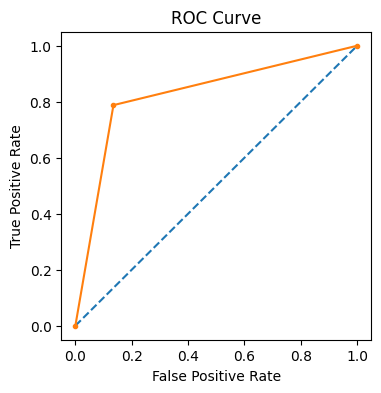

In [47]:
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [48]:
# Kết quả tốt hơn so với ban đầu